In [54]:
import pandas as pd 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import r2_score
from math import sqrt, pow
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import time

In [55]:
#5th Experiment Single car
data_orgin=pd.read_csv("../data/spritmonitor/volkswagen_e_golf.csv")

In [56]:
df=data_orgin.copy()

In [4]:
df.head()

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            3345 non-null   object 
 1   model                   3345 non-null   object 
 2   version                 3345 non-null   object 
 3   power(kW)               3345 non-null   int64  
 4   fuel_date               3345 non-null   object 
 5   trip_distance(km)       3344 non-null   object 
 6   quantity(kWh)           3344 non-null   float64
 7   fuel_type               3345 non-null   object 
 8   tire_type               3345 non-null   object 
 9   city                    3345 non-null   int64  
 10  motor_way               3345 non-null   int64  
 11  country_roads           3345 non-null   int64  
 12  driving_style           3345 non-null   object 
 13  consumption(kWh/100km)  3345 non-null   float64
 14  A/C                     3345 non-null   

In [57]:
df['trip_distance(km)']=df['trip_distance(km)'].astype('str')
df['trip_distance(km)']=df['trip_distance(km)'].apply(lambda x: x.replace(',',''))

In [58]:
df['trip_distance(km)']=df['trip_distance(km)'].apply(lambda x: x.replace(',',''))

In [8]:
df.head()

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [9]:
df['trip_distance(km)']=df['trip_distance(km)'].astype('float64')

In [10]:
df=df[df['trip_distance(km)']!=0]

In [11]:
print('min', df['trip_distance(km)'].min())
print('max', df['trip_distance(km)'].max())
print('mean', df['trip_distance(km)'].mean())
print('size', df['trip_distance(km)'].shape)

min 0.5
max 642.0
mean 42.05371770334928
size (3345,)


In [12]:
# df=df[df['trip_distance(km)']<=300]

In [13]:
print('size', df['trip_distance(km)'].shape)

size (3345,)


In [14]:
df.head()

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80.0,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50.0,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43.0,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44.0,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76.0,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2


In [15]:
def convert_encodecategorical(data_sel):
     data_sel=data_sel.loc[(data_sel['driving_style']!='driving_style') & (data_sel['tire_type']!='tire_type'), :]
     data_sel.loc[:,'tire_type']=data_sel['tire_type'].map({'All-year tires':1,'Summer tires':3,'Winter tires':2, 'tire_type':0})
     data_sel.loc[:,'driving_style']=data_sel['driving_style'].map({'Fast':3,'Moderate':2,'Normal':1})
     
     return data_sel

def convert_to_numeric(columns,df):
    for col in columns:
        if col!='fuel_date':
           df.loc[:, col]=pd.to_numeric(df.loc[:,col], errors='coerce')
    return df

In [16]:
def convert_date(data_sel_num):
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].astype('str')
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].apply(lambda x :x.replace(".",'-'))
    data_sel_num['fuel_date_new']=pd.to_datetime(data_sel_num['fuel_date'], errors='coerce', format='%d-%m-%Y')
    # extracting month , day and day of the week from fuel_date
    data_sel_num['month']=data_sel_num['fuel_date_new'].dt.month
    data_sel_num['weekday']=data_sel_num['fuel_date_new'].dt.weekday
    data_sel_num['day']=data_sel_num['fuel_date_new'].dt.day
    data_sel_num.drop(columns=['fuel_date','fuel_date_new'], axis=1, inplace=True)
    return data_sel_num

# Spliting Test and train

In [17]:
y=pd.DataFrame(df['trip_distance(km)'])
X=df.drop(columns=['trip_distance(km)'], axis=1)

In [18]:
X_train_sprit, X_test_sprit, y_train_sprit, y_test_sprit=train_test_split(X, y, test_size=0.4, shuffle=True)



In [19]:
X_train_sprit.isna().sum()/X_train_sprit.shape[0]

manufacturer              0.000000
model                     0.000000
version                   0.000000
power(kW)                 0.000000
fuel_date                 0.000000
quantity(kWh)             0.000498
fuel_type                 0.000000
tire_type                 0.000000
city                      0.000000
motor_way                 0.000000
country_roads             0.000000
driving_style             0.000000
consumption(kWh/100km)    0.000000
A/C                       0.000000
park_heating              0.000000
avg_speed(km/h)           0.002990
ecr_deviation             0.000000
dtype: float64

In [20]:
X_test_sprit.isna().sum()/X_test_sprit.shape[0]

manufacturer              0.000000
model                     0.000000
version                   0.000000
power(kW)                 0.000000
fuel_date                 0.000000
quantity(kWh)             0.000000
fuel_type                 0.000000
tire_type                 0.000000
city                      0.000000
motor_way                 0.000000
country_roads             0.000000
driving_style             0.000000
consumption(kWh/100km)    0.000000
A/C                       0.000000
park_heating              0.000000
avg_speed(km/h)           0.005232
ecr_deviation             0.000000
dtype: float64

In [21]:
train_data=pd.concat([X_train_sprit,y_train_sprit], axis=1)
test_data=pd.concat([X_test_sprit,y_test_sprit], axis=1)

In [22]:
train_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [23]:
train_data.head()

,manufacturer,model,version,power(kW),fuel_date,quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,trip_distance(km)
1552,Volkswagen,Golf,e-Golf,85,08.09.2017,1.90,Electricity,Summer tires,1,1,1,Moderate,10.0,0,0,47.0,-6.8,19.0
2345,Volkswagen,Golf,e-Golf,85,28.05.2016,0.58,Electricity,Summer tires,1,0,0,Moderate,14.4,0,0,34.0,-2.4,4.0
2828,Volkswagen,Golf,e-Golf,85,23.09.2015,3.74,Electricity,Summer tires,1,1,1,Normal,18.7,0,1,45.0,1.9,20.0
2201,Volkswagen,Golf,e-Golf,85,12.08.2016,3.82,Electricity,Summer tires,1,1,1,Fast,19.1,0,0,52.0,2.3,20.0
3075,Volkswagen,Golf,e-Golf,85,21.05.2015,51.41,Electricity,Summer tires,0,1,0,Moderate,11.4,0,0,60.0,-5.4,451.0


In [24]:
train_data.shape

(2000, 18)

In [25]:
test_data.shape

(1331, 18)

In [26]:
y_train_sprit=train_data['trip_distance(km)']
X_train_sprit=train_data.drop(columns=['trip_distance(km)'], axis=1)

y_test_sprit=test_data['trip_distance(km)']
X_test_sprit=test_data.drop(columns=['trip_distance(km)'], axis=1)


# Feature Selection

In [27]:
fetures_sel1=[ 'fuel_date','quantity(kWh)', 
               'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
               'consumption(kWh/100km)',  'A/C', 'park_heating',
                  'ecr_deviation','avg_speed(km/h)']

In [28]:
X_test_sel=X_test_sprit[fetures_sel1].copy()
X_train_sel=X_train_sprit[fetures_sel1].copy()

In [29]:
train_model_cat=convert_encodecategorical(X_train_sel)
test_model_cat=convert_encodecategorical(X_test_sel)

In [30]:
X_train_sprit=convert_date(train_model_cat.copy())
X_test_sprit=convert_date(test_model_cat.copy())

# Evaluation and Ploting 

In [31]:
def plotresults(y_test, y_pred_test, tittle):
    x_axis=range(len(y_test))
    plt.figure(figsize=(5,5))
    plt.plot(x_axis, y_test, linewidth=1, label="Actual Values" )
    plt.plot(x_axis, y_pred_test, linewidth=1.1, label="Predicted Values")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Number of Trips', weight='bold', size=8)
    plt.ylabel('Trip Distance', weight='bold',size=8)
    plt.title(tittle,weight='bold',size=10)
    plt.xticks(weight='bold', size=7)
    plt.yticks(weight='bold', size=7)
    plt.grid(True)
    plt.show()

In [32]:

def calulate_metrics(y_test, y_pred_test):
    mse=  format(mean_squared_error(np.array(y_test), y_pred_test, squared=False),'.4f')
    rmse = format(np.sqrt(mean_squared_error(np.array(y_test), y_pred_test, squared=False)), '.4f')
    mae= format(mean_absolute_error(np.array(y_test), y_pred_test),'.4f')
    r2=format(r2_score(y_test,y_pred_test),'.4f')
    return mse, rmse, mae, r2

In [33]:
def evaluate_metrics(y_test, X_test,regressor_model, tittle, timetaken):
    y_pred_test=regressor_model.predict(X_test)
    mse, rmse,mae,r2=calulate_metrics(np.round(y_test,6), np.round(y_pred_test,6))
    print('Y pred Mean',round(y_pred_test.mean(),6))
    print('MSE',mse)
    print('RMSE', rmse)
    print('MAE', mae)
    print('R2',r2)
    print('timetaken', timetaken)
    results={}
    results['Model Name']=tittle
    results['Y Mean']=y_test.mean()
    results['Y Pred Mean']=y_pred_test.mean()
    results['MSE']=mse
    results['RMSE']=rmse
    results['MAE']=mae
    results['R2']=r2
    results['Excution Time']=timetaken
    plotresults(y_test, y_pred_test, tittle)
    return y_pred_test

In [34]:
def DistributionPlot(y_test, y_pred, Title):
    plt.figure(figsize=(4, 4))
    ax1 = sns.distplot(y_test, label='Actual values',hist=False )
    ax2 = sns.distplot(y_pred,  label='Predicted Values',hist=False)
    plt.title(Title,weight='bold', size=10)
    plt.xlabel('Trip Distance', weight='bold', size=8)
    plt.ylabel('Density',weight='bold', size=8)
    plt.xticks( weight='bold', size=7)
    plt.yticks( weight='bold', size=7)
    plt.legend()
    plt.show()
    plt.close()

# Modelling

## 1. Decission Tree

### Base 

In [35]:
def decisionTree(X_train, y_train, X_test, y_test):
    start_time = time.time()
    dectreeRegModel=DecisionTreeRegressor()
    dectreeRegModel.fit(pd.DataFrame(X_train), np.ravel(y_train))
    timetaken=(time.time() - start_time)
    y_pred_deci=evaluate_metrics(y_test,X_test, dectreeRegModel, 'Base Decission Tree results',timetaken)
    #export_graphviz(dectreeRegModel, out_file ='../reports/tree_structure.dot', 
       #        feature_names =X_train_sprit.columns)
    return dectreeRegModel, y_test_sprit,y_pred_deci

In [36]:
print('y_test_sprit',round(y_test_sprit.mean(),6))

y_test_sprit 41.075231


In [37]:
X_train_sprit.shape

(2000, 14)

In [38]:
y_train_sprit.shape

(2000,)

Y pred Mean 42.221638
MSE 33.2358
RMSE 5.7651
MAE 9.3898
R2 0.5426
timetaken 0.017070293426513672


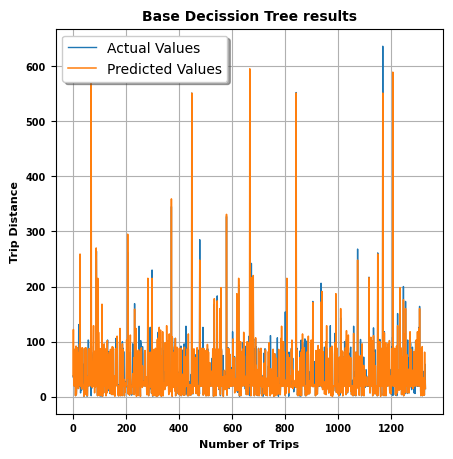

In [39]:
dectreeRegModel,y_test_sprit, y_pred_deci=decisionTree(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

### Tuned 

In [40]:
pd.set_option('display.max_rows', 10)
def runTunedDecFor(X_train, y_train, X_test, y_test):
    params_grid={
            'max_depth':[ i for i in range(1,10)],
            'min_samples_leaf': [ i for i in range(1,8)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error','absolute_error'],
            'splitter':['best', 'random'],
            'max_features':['sqrt','log2']}
    
    
    skfold= StratifiedKFold(n_splits=5, shuffle=True)
    start_time = time.time()
    dec_cv=DecisionTreeRegressor()
    dec_random = RandomizedSearchCV(estimator = dec_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    dec_random.fit(X_train,np.ravel(y_train))
    endtime= time.time()-start_time
    y_pred=evaluate_metrics(y_test,X_test,dec_random, 'Tuned DecisionTree',endtime)
    return dec_random, y_test, y_pred

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=9, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, m

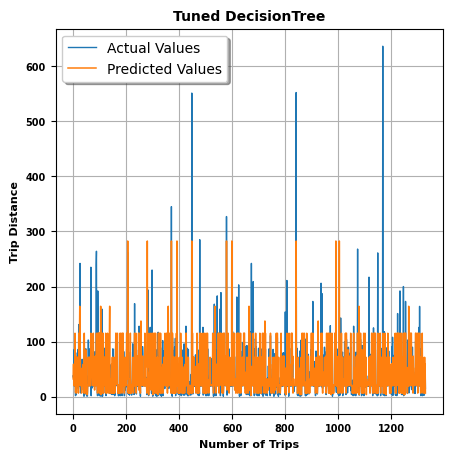

In [41]:
dec_random,y_test, y_pred=runTunedDecFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

## Random Forest

### Base

In [42]:
def runRandonForest(X_train, y_train, X_test, y_test):
    start_time = time.time()
    rf=RandomForestRegressor(n_estimators=100)
    rf_model=rf.fit(X_train,np.ravel(y_train))
    timetaken=  time.time()-start_time
    y_pred_rf_base=evaluate_metrics(y_test,X_test,rf_model, 'Base RandomForest results',timetaken)
    return rf_model,y_pred_rf_base

Y pred Mean 42.407273
MSE 30.8337
RMSE 5.5528
MAE 7.7827
R2 0.6063
timetaken 0.9859292507171631


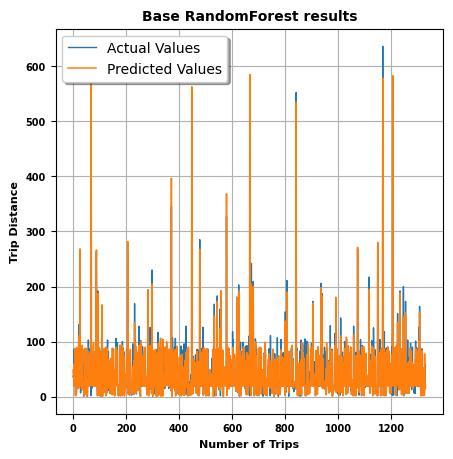

In [43]:
rf_model,y_pred_rf_base=runRandonForest(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

### Tuned

In [44]:
pd.set_option('display.max_rows', 10)
rf_cv=RandomForestRegressor()
skfold= StratifiedKFold(n_splits=5, shuffle=True)

In [45]:
def runTunedRanFor(X_train, y_train, X_test, y_test):
    params_grid={
            'n_estimators': [i for i in range(1,150)],
            'bootstrap': [True, False],
            'max_depth':[ i for i in range(1,14)],
            'min_samples_leaf': [ i for i in range(1,10)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error'] }
    start_time=time.time()
    rf_cv=RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    rf_model=rf_random.fit(X_train,np.ravel(y_train))
    timetaken=time.time()-start_time
    y_prd=evaluate_metrics(y_test,X_test,rf_model, 'RandomForest Tree results',timetaken)
    return rf_model, y_test, y_prd

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.2s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.3s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.4s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   0.6s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, min

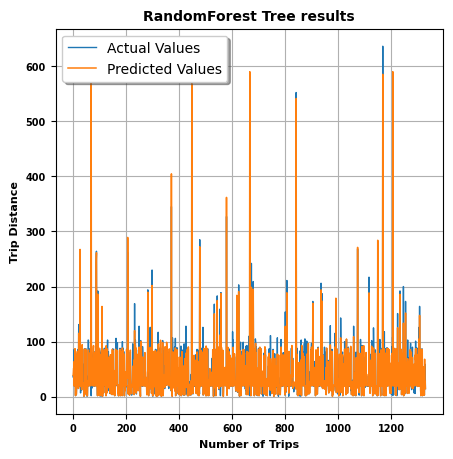

In [46]:
#runTunedRanFor(X_kmeans_train, y_kmeans_train, X_kmeans_test, y_kmeans_test)
rf_model,y_test, y_prd=runTunedRanFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

## XGB

### Base

In [49]:
def runXGboost(X_train, y_train, X_test, y_test):  
    # Instantiation
    start_time = time.time()
    params = {'objective':'reg:squarederror',
              'enable_categorical':'True'
              } 
    xgb_r = xgb.XGBRegressor(**params)
    # Fitting the model
    #xgb_r.fit(pca_train[:,:6],np.ravel(y_train))
    xgb_r.fit(X_train,np.ravel(y_train))
    timetaken= time.time()-start_time 
    evaluate_metrics(y_test,X_test,xgb_r,'Base XGB Analysis',timetaken)
    return xgb_r

In [50]:
xgb_r=runXGboost(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:tire_type: object, driving_style: object

### Tuned

In [51]:
def tunedXGBoost(X_train, y_train, X_test, y_tets):
    skf = StratifiedKFold(n_splits=5,
                        shuffle=True, 
                        random_state=0)
    space={   
        'objective':['reg:squarederror'],
        'max_depth': [1, 2,3,4,5,6,7,8,9,10],
        'n_estimators': [i for i in range(1,200)],
            'learning_rate':[0.01,0.1, 1.0] ,
            'subsample':[0.5,.6,.7,0.8],  
            'eta':[0.1],
            'lambda':[0.01],
            'booster':['gbtree']
        }
    start_time=time.time()
    xgb_r_tun = xgb.XGBRegressor( )
    xgb_cv = RandomizedSearchCV(estimator=xgb_r_tun,param_distributions=space, cv=5,n_iter=100)
    #xgb_cv=xgb_cv.fit(pca_train[:,:6], y_train)
    xgb_cv.fit(X_train, y_train)
    timetaken=  time.time()-start_time
    y_pred_test=evaluate_metrics(y_test_sprit,X_test_sprit,xgb_cv,'XGB Tuned',timetaken )
    return xgb_cv,y_test_sprit,y_pred_test

Y pred Mean 42.45213
MSE 16.0178
RMSE 4.0022
MAE 7.3059
R2 0.9258
timetaken 188.59452033042908


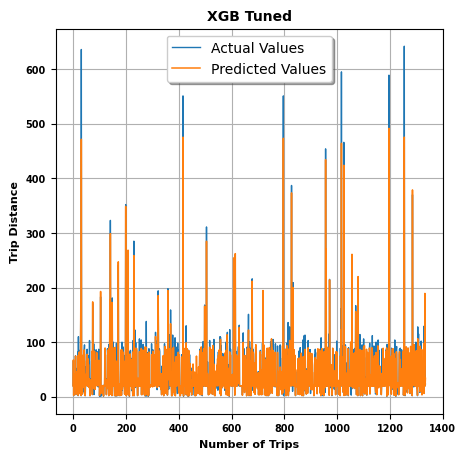

In [ ]:
xgb_cv,y_test_sprit,y_pred_test_xgb=tunedXGBoost(X_train_sprit, y_train_sprit, y_test_sprit, X_test_sprit)

## Light GBM 

In [52]:
def runLightGBM(X_train, y_train, X_test, y_test):
    starttime=time.time()
    lgbm_model=LGBMRegressor( objective = "regression")
    #lgbm_model.fit(pca_train[:,:6],np.ravel(y_train))
    lgbm_model.fit(X_train,np.ravel(y_train))
    timetaken= time.time()-starttime
    y_pred_test=evaluate_metrics(y_test, X_test, lgbm_model, 'Base LightGBM Results',timetaken)
    return y_pred_test

In [53]:
y_pred_test_lgbm=runLightGBM(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: tire_type, driving_style